In [ ]:
#Importing Data Manipulation Libraries
import numpy as np
import pandas as pd
#Importing Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Importing Warnings
import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(levelname)s - %(message)s',
                    filemode='w',
                    filename='model.log',force=True)
# import Scikit Learn Libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix


In [22]:
# importing dataset using pandas function
df = pd.read_csv('loan_data.csv')
df.sample(frac=0.10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
11819,25.0,female,Associate,104178.0,5,RENT,10000.0,HOMEIMPROVEMENT,11.01,0.10,2.0,615,Yes,0
1238,24.0,male,Bachelor,30823.0,2,MORTGAGE,7000.0,DEBTCONSOLIDATION,9.32,0.23,2.0,653,Yes,0
13759,25.0,female,Bachelor,70451.0,2,RENT,13600.0,MEDICAL,9.99,0.19,2.0,593,Yes,0
8027,24.0,male,Bachelor,45766.0,1,RENT,7200.0,EDUCATION,8.90,0.16,4.0,584,No,0
8528,24.0,female,Bachelor,55085.0,2,RENT,7800.0,PERSONAL,7.51,0.14,3.0,610,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22384,28.0,female,High School,66959.0,5,OWN,18000.0,PERSONAL,7.90,0.27,6.0,587,Yes,0
26748,33.0,male,Associate,44629.0,10,RENT,15000.0,PERSONAL,11.14,0.34,10.0,662,No,1
30145,38.0,female,Bachelor,36991.0,16,RENT,5600.0,EDUCATION,9.99,0.15,15.0,637,No,1
12249,23.0,male,Bachelor,96579.0,0,OWN,9000.0,PERSONAL,9.62,0.09,2.0,560,Yes,0


In [23]:
#Problem Definition
'''
1. To predict whether the person is eligible to approve loan or not 
2. To understand the Buisness model and provide suitable solution 
   for same
 
'''

'\n1. To predict whether the person is eligible to approve loan or not \n2. To understand the Buisness model and provide suitable solution \n   for same\n \n'

In [24]:
# CHecking Dataset Information
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

<Axes: >

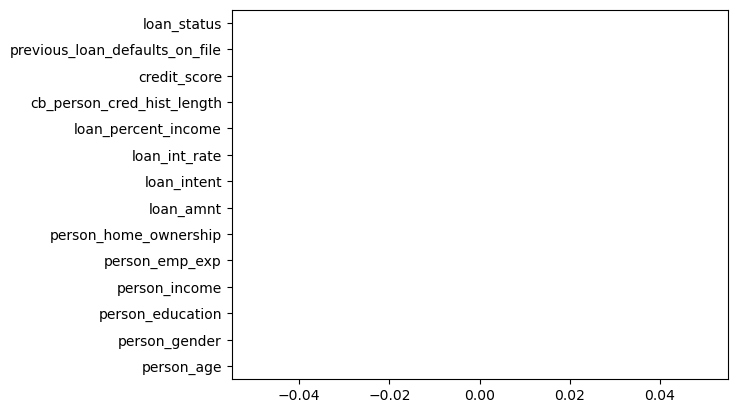

In [25]:
# checking null values statistic using graphical method
df.isnull().sum().plot(kind = 'barh')

In [26]:
# sagregate categoricall and numerical columns
categorical_columns = df.select_dtypes(include='object')
numerical_columns = df.select_dtypes(exclude='object')

In [27]:
# Exploratory Data Analysis : Univariate Analysis

from collections import OrderedDict

stats=[]
for col in numerical_columns.columns:
  numerical_stats = OrderedDict({
      'feature':col,
      'count':df[col].count(),
      'mean':df[col].mean(),
      'median':df[col].quantile(0.50),
      'mode':df[col].mode()[0],
      'min':df[col].min(),
      'max':df[col].max(),
      'std':df[col].std(),
      'var':df[col].var(),
      'skew':df[col].skew(),
      'kurt':df[col].kurtosis(),
      'iqr':df[col].quantile(0.75)-df[col].quantile(0.25),
      'q1': df[col].quantile(0.25),
      'q3': df[col].quantile(0.75),
  })
  stats.append(numerical_stats)
  report = pd.DataFrame(stats)

report

,feature,count,mean,median,mode,min,max,std,var,skew,kurt,iqr,q1,q3
0,person_age,45000,27.764178,26.00,23.00,20.00,144.00,6.045108,3.654333e+01,2.548154,18.649449,6.00,24.00,30.00
1,person_income,45000,80319.053222,67048.00,8000.00,8000.00,7200766.00,80422.498632,6.467778e+09,34.137583,2398.684769,48585.25,47204.00,95789.25
2,person_emp_exp,45000,5.410333,4.00,0.00,0.00,125.00,6.063532,3.676642e+01,2.594917,19.168324,7.00,1.00,8.00
3,loan_amnt,45000,9583.157556,8000.00,10000.00,500.00,35000.00,6314.886691,3.987779e+07,1.179731,1.351215,7237.25,5000.00,12237.25
4,loan_int_rate,45000,11.006606,11.01,11.01,5.42,20.00,2.978808,8.873299e+00,0.213784,-0.420335,4.40,8.59,12.99
5,loan_percent_income,45000,0.139725,0.12,0.08,0.00,0.66,0.087212,7.605987e-03,1.034512,1.082416,0.12,0.07,0.19
6,cb_person_cred_hist_length,45000,5.867489,4.00,4.00,2.00,30.00,3.879702,1.505209e+01,1.631720,3.725945,5.00,3.00,8.00
7,credit_score,45000,632.608756,640.00,658.00,390.00,850.00,50.435865,2.543776e+03,-0.610261,0.203022,69.00,601.00,670.00
8,loan_status,45000,0.222222,0.00,0.00,0.00,1.00,0.415744,1.728433e-01,1.336351,-0.214176,0.00,0.00,0.00


In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in categorical_columns.columns:
    df[i] = le.fit_transform(df[i])

In [29]:
'''
step 1: split the data into X and y

step 2: split the data into 
        train data:seen data
        test data : unseen data

step 3: Try balance the target column in case of classification problem
        Imbalance technique : 1. Oversampeling 2. Undersampling

step 4: use Scaling technique
        1. MinMaxScaler
        2.RobustScaler
        3.StandardScaler

Step 5: Model Building        
'''
X = df.drop(columns = ['loan_status'],axis= 1)
y = df['loan_status']

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state = 42)

In [31]:
df['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [35]:
from imblearn.over_sampling import SMOTE
SM =SMOTE(random_state =42)
X_train,y_train = SM.fit_resample(X_train,y_train)
y_train.value_counts()


loan_status
0    24507
1    24507
Name: count, dtype: int64

In [ ]:
sc = RobustScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
from sklearn.ensemble  import RandomForestClassifier
RF = RandomForestClassifier().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)
print("The model accuracy for the random forest regressor",accuracy_score(y_pred_RF,y_test)*100)

The model accuracy for the random forest regressor 90.35555555555555


In [40]:
from sklearn.neighbors import KNeighborsClassifier
KN = KNeighborsClassifier().fit(X_train,y_train)
y_pred_KN = KN.predict(X_test)
print("The accuracy for the knn",accuracy_score(y_pred_KN,y_test)*100)

The accuracy for the knn 86.02222222222223


In [41]:
from sklearn.linear_model import SGDClassifier
SG = SGDClassifier(random_state=42).fit(X_train,y_train)
y_pred_SG = SG.predict(X_test)
print("the accuracy score for sgdclassifier",accuracy_score(y_pred_SG,y_test)*100)

the accuracy score for sgdclassifier 85.97037037037038


In [42]:
from sklearn.cluster import KMeans
KM = KMeans().fit(X_test,y_test)
y_pred_KM = KM.predict(X_test)
print("the accuracy for kmeans",accuracy_score(y_pred_KM,y_test)*100)

the accuracy for kmeans 3.414814814814815


In [43]:
from sklearn.cluster import KMeans
KM = KMeans().fit(X_test,y_test)
y_pred_KM = KM.predict(X_test)
print("the accuracy for kmeans",accuracy_score(y_pred_KM,y_test)*100)

the accuracy for kmeans 18.288888888888888


In [44]:
import xgboost as xg

xgb = xg.XGBClassifier(random_state = 42).fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)

print('Model Accuracy for XGBoost Classifier: ',accuracy_score(y_test,y_pred_xgb)*100)

Model Accuracy for XGBoost Classifier:  92.45925925925927
